# Short-term Electricity Load Forecasting (Panama Case Study)



# Table of Contents

- [<font size="5">1. Exploration and Cleaning</font>](#ref2)

    - [<font size="4">1.1 Dataset</font>](#ref21)

    - [<font size="4">1.2 Data Preprocessing</font>](#ref22)
    
    
    
- [<font size="5">2. Time Series Analysis</font>](#ref3)

    - [<font size="4">2.1 Decomposition and stationarity tests</font>](#ref31)

    - [<font size="4">2.2 Autocorrelation and Partial Autocorrelation</font>](#ref32)


- [<font size="5">3. Feature Engineering</font>](#ref4)

    - [<font size="4">3.1 Feature Generation](#ref41)
    

- [<font size="5">4. Load Forecasting</font>](#ref5)

    - [<font size="4">4.1 MLR</font>](#ref51)

# <a id='ref2'>1. Exploration and Cleaning</a>

## <a id='ref21'>1.1 Dataset

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score



%matplotlib inline



In [4]:
df = pd.read_csv('data/continuous dataset.csv')
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [4]:
df.dtypes

datetime       object
nat_demand    float64
T2M_toc       float64
QV2M_toc      float64
TQL_toc       float64
W2M_toc       float64
T2M_san       float64
QV2M_san      float64
TQL_san       float64
W2M_san       float64
T2M_dav       float64
QV2M_dav      float64
TQL_dav       float64
W2M_dav       float64
Holiday_ID      int64
holiday         int64
school          int64
dtype: object

In [5]:
df.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


In [6]:
print('There are {} missing values or NANs in df.'.format(df.isnull().values.sum()))
temp_df = df.duplicated(keep='first').sum()
print('There are {} duplicate rows in df based on all columns.'.format(temp_df))

There are 0 missing values or NANs in df.
There are 0 duplicate rows in df based on all columns.


## <a id="ref22">1.2 Data Preprocessing

In [7]:
df.datetime = pd.to_datetime(df.datetime.astype(str))
df.set_index(df["datetime"],inplace=True)
df.sort_index(inplace=True)
df = df['2018':'2019']

In [8]:
df.drop("datetime",axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2018-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  17520 non-null  float64
 1   T2M_toc     17520 non-null  float64
 2   QV2M_toc    17520 non-null  float64
 3   TQL_toc     17520 non-null  float64
 4   W2M_toc     17520 non-null  float64
 5   T2M_san     17520 non-null  float64
 6   QV2M_san    17520 non-null  float64
 7   TQL_san     17520 non-null  float64
 8   W2M_san     17520 non-null  float64
 9   T2M_dav     17520 non-null  float64
 10  QV2M_dav    17520 non-null  float64
 11  TQL_dav     17520 non-null  float64
 12  W2M_dav     17520 non-null  float64
 13  Holiday_ID  17520 non-null  int64  
 14  holiday     17520 non-null  int64  
 15  school      17520 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 2.3 MB


In [9]:
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig,ax = plt.subplots(figsize=(30,12))
    ax.set_xlabel('Time',fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel,fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

/var/folders/g9/8dl_m7ms2gd5gm2zghqh2rl00000gn/T/ipykernel_1123/1377567740.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


# <a id="ref3">2. Time Series Analysis

## <a id="ref31">2.1 Decomposition and Stationarity Tests

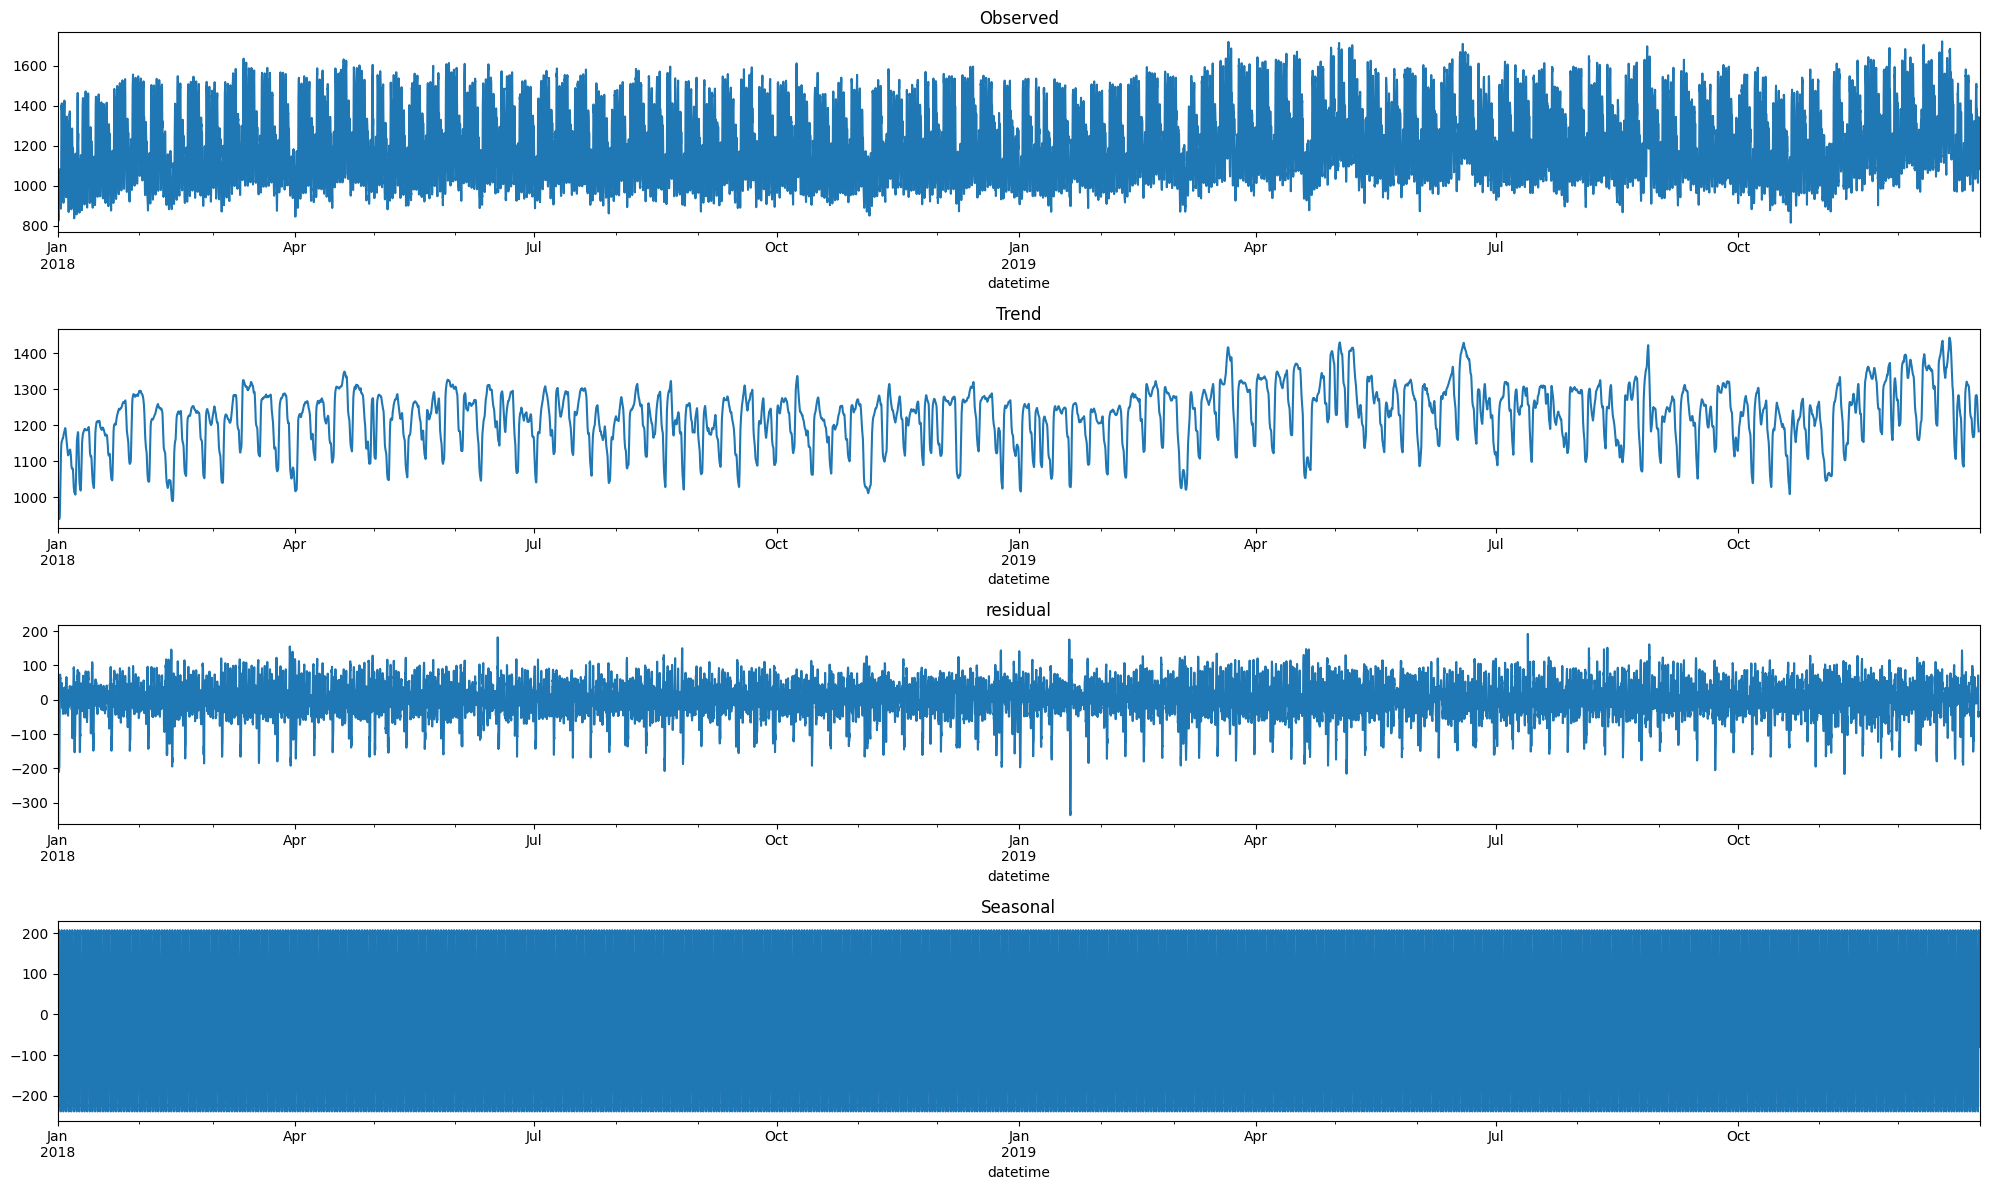

In [12]:
res = sm.tsa.seasonal_decompose(df["nat_demand"],model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [11]:
value_to_change = df[df["nat_demand"]<800][["nat_demand"]]

df.loc[value_to_change.index,"nat_demand"] = 900





**Augmented Dickey-Fuller (ADF) Test**

In [13]:
y = df["nat_demand"]
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0],adf_test[1],adf_test[2]))
for key,value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key,value))


ADF Statistic: -13.234764
p-value: 0.000000
#Lags used: 44
Critical Value (1%): -3.430724
Critical Value (5%): -2.861705
Critical Value (10%): -2.566858


## <a id="ref32">2.2 Autocorrelation and Partial Autocorrelation </a>

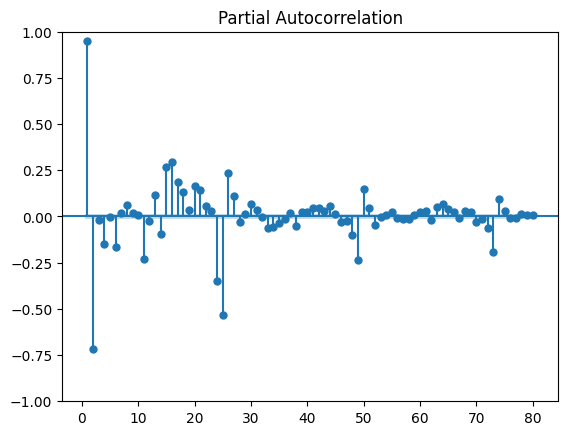

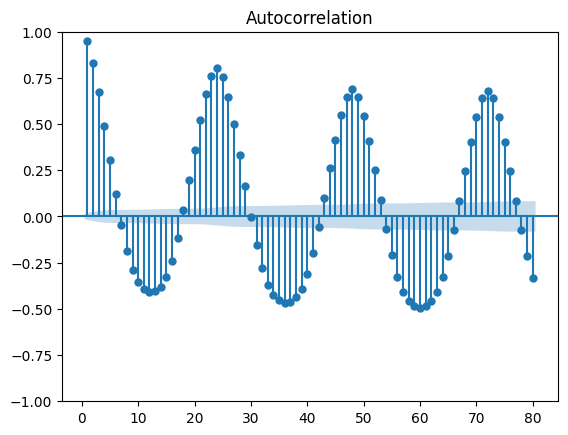

In [14]:
#Lag-value check

plot_pacf(df["nat_demand"], lags=80, zero = False)
plot_acf(df["nat_demand"], lags=80, zero=False)
plt.show()

In [15]:
import statsmodels.api as sm

pacf,ci = sm.tsa.pacf(df["nat_demand"],alpha=0.05)

pacf_index = np.where(np.absolute(ci[:,0]) > 0.25)
print("significant time-lags: ",pacf_index[0])



significant time-lags:  [ 0  1  2 15 16 24 25]


In [16]:
df["nat_demand_lag_1"] = df["nat_demand"].shift(1)
df["nat_demand_lag_2"] = df["nat_demand"].shift(2)
df["nat_demand_lag_15"] = df["nat_demand"].shift(15)
df["nat_demand_lag_16"] = df["nat_demand"].shift(16)
df["nat_demand_lag_24"] = df["nat_demand"].shift(24)
df["nat_demand_lag_25"] = df["nat_demand"].shift(25)

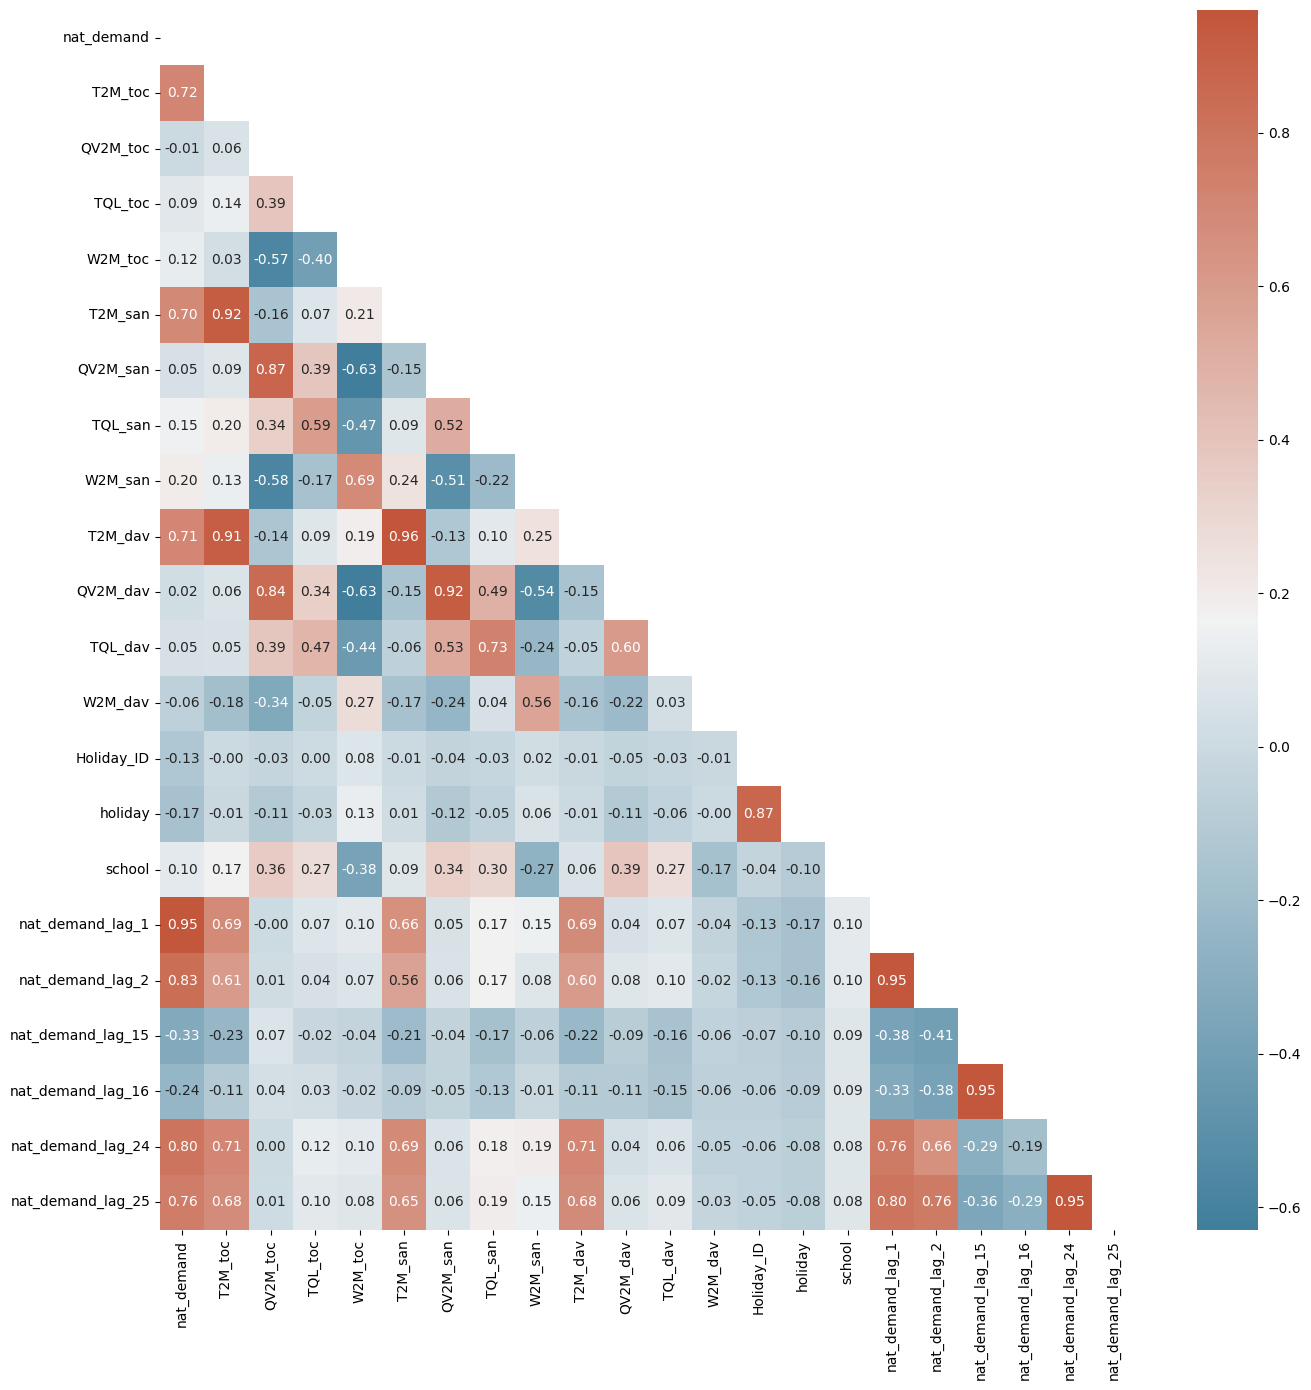

In [17]:
#Correlation plot

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)

fig = plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt= '.2f',mask=mask, cmap = cmap)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show 

In [24]:
highly_correlated = abs(corr[corr > 0.6])
print(highly_correlated[highly_correlated<1.0]["nat_demand"].dropna())

T2M_toc              0.715809
T2M_san              0.695175
T2M_dav              0.707742
nat_demand_lag_1     0.949474
nat_demand_lag_2     0.830758
nat_demand_lag_24    0.803952
nat_demand_lag_25    0.757226
Name: nat_demand, dtype: float64


In [29]:
categorical = ["Holiday_ID","holiday","school","hour","weekday","month"]

features_continuous = highly_correlated[highly_correlated<1.0]["nat_demand"].dropna().index.tolist()

features = features_continuous + categorical

target = ["nat_demand"]

print("features that will be used: ",features)

features that will be used:  ['T2M_toc', 'T2M_san', 'T2M_dav', 'nat_demand_lag_1', 'nat_demand_lag_2', 'nat_demand_lag_24', 'nat_demand_lag_25', 'Holiday_ID', 'holiday', 'school', 'hour', 'weekday', 'month']


# <a id="ref4">3. Feature Engineering </a>

## <a id="href41">3.1 Feature Generation </a>

In [28]:
#Generate 'hour', 'weekday', and 'month' features

for i in range(len(df)):
    position = df.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    df.loc[position,'hour'] = hour
    df.loc[position,'weekday'] = weekday
    df.loc[position,'month'] = month

In [30]:
#Split Train,Validation and Test Data

df_final = df[target+features]

y = df_final.iloc[:,:1]
X = df_final.iloc[:,1:]

X.reset_index(inplace=True)
y.reset_index(inplace=True)

X_train = X[:12264]
X_val = X[12264:15768]
X_test = X[15768:]

y_train = y[:12264]
y_val = y[12264:15768]
y_test = y[15768:]



In [31]:
X_train.set_index("datetime",inplace=True)
X_val.set_index("datetime",inplace=True)
X_test.set_index("datetime",inplace=True)

y_train.set_index("datetime",inplace=True)
y_val.set_index("datetime",inplace=True)
y_test.set_index("datetime",inplace=True)

In [33]:
X_train.dropna(inplace=True)
y_train = y_train[y_train.index > "2018-01-02 00:00:00"]


/opt/homebrew/lib/python3.11/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [36]:
#Scale data

feature_scaler = MinMaxScaler(feature_range=(0,1.0))
target_scaler = MinMaxScaler(feature_range=(0,1.0))

feature_scaler.fit(np.array(X_train))
target_scaler.fit(np.array(y_train).reshape(-1,1))

X_train_scaled = feature_scaler.transform(np.array(X_train))
X_val_scaled = feature_scaler.transform(np.array(X_val))
X_test_scaled = feature_scaler.transform(np.array(X_test))

y_train_scaled = target_scaler.transform(np.array(y_train).reshape(-1,1))
y_val_scaled = target_scaler.transform(np.array(y_val).reshape(-1,1))
y_test_scaled = target_scaler.transform(np.array(y_test).reshape(-1,1))



# <a id ="ref5">4. Load Forecasting </a>

## <a id="ref51">4.1 Multilinear Regression </a>

In [41]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled,y_train_scaled)

y_pred_lr = linear_reg.predict(X_test_scaled)


y_pred_lr = target_scaler.inverse_transform(y_pred_lr)
y_pred_lr = pd.DataFrame(y_pred_lr, columns=["y_hat"], index=y_test.index)



In [50]:
r2 = r2_score(y_test,y_pred_lr)
mse = mean_squared_error(y_test,y_pred_lr)
mape = mean_absolute_percentage_error(y_test,y_pred_lr)
mae = mean_absolute_error(y_test,y_pred_lr)

print("R2: {}\nMSE: {}\nMAE: {}\nMAPE: {}".format(r2,mse,mae,mape))

R2: 0.9716411637448307
MSE: 1032.8347152795782
MAE: 23.051851108498916
MAPE: 0.018413290661421


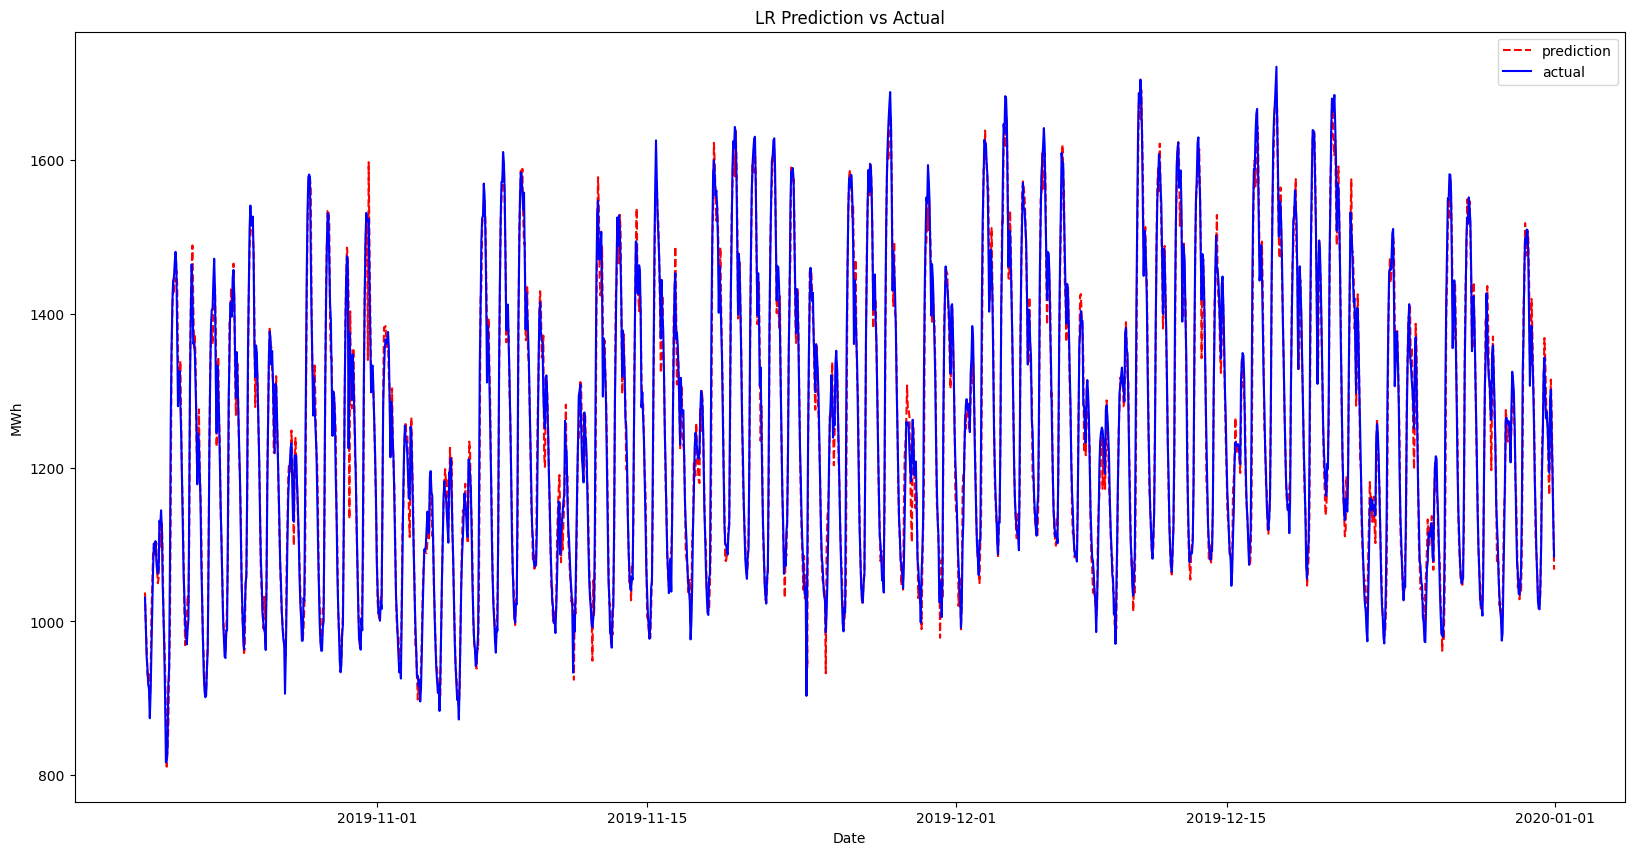

In [53]:
plt.figure(figsize=(20,10))
plt.plot(y_pred_lr,linestyle="dashed",color='r')
plt.plot(y_test,linestyle="solid",color='b')
plt.xlabel("Date")
plt.ylabel("MWh")
plt.legend(["prediction","actual"])
plt.title("LR Prediction vs Actual")
plt.show()

In [ ]:
#test branch